In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#載入資料
data = pd.read_excel('./01train.xlsx')

In [4]:
# 資料大小
data.shape

(3903, 15)

In [5]:
#Summary of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3903 entries, 0 to 3902
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   手機螢幕溫度(平均)     3903 non-null   float64
 1   手機螢幕溫度(最大)     3903 non-null   float64
 2   手機背蓋溫度(平均)     3903 non-null   float64
 3   平均APP運作指標/小時   3903 non-null   float64
 4   充電時間指標         3903 non-null   float64
 5   手機電池電量         3903 non-null   float64
 6   CPU跑分階級        3903 non-null   int64  
 7   手機外殼/包膜指標      3903 non-null   float64
 8   外型平均曲率         3903 non-null   float64
 9   上網頻率指標         3903 non-null   float64
 10  通話頻率指標         3903 non-null   float64
 11  新機/二手/老舊       3903 non-null   int64  
 12  內容容量比率         3903 non-null   float64
 13  CPU效能等級        3903 non-null   int64  
 14  Underclocking  3903 non-null   int64  
dtypes: float64(11), int64(4)
memory usage: 457.5 KB


In [6]:
#計算資料的分布情況
for col in data.columns:
    
    print(data[col].value_counts()) 

44.190476    11
39.285714    10
36.214286    10
42.952381     9
29.738095     9
             ..
58.357143     1
56.404762     1
42.428571     1
59.380952     1
40.547619     1
Name: 手機螢幕溫度(平均), Length: 1412, dtype: int64
28.809524    15
37.023810    12
49.380952    11
32.166667    11
39.190476    10
             ..
19.785714     1
42.404762     1
48.785714     1
53.333333     1
47.071429     1
Name: 手機螢幕溫度(最大), Length: 1211, dtype: int64
69.400000    15
74.466667    12
59.560000     9
68.400000     9
53.053333     9
             ..
40.474724     1
54.580000     1
54.753333     1
51.643133     1
57.946667     1
Name: 手機背蓋溫度(平均), Length: 1504, dtype: int64
227.0     9
545.8     8
1047.0    7
529.2     7
226.2     6
         ..
262.8     1
289.5     1
435.1     1
318.5     1
265.6     1
Name: 平均APP運作指標/小時, Length: 1643, dtype: int64
0.000000    445
0.166667     26
0.333333     21
0.095238     14
0.083333     13
           ... 
0.363636      1
0.605634      1
0.151163      1
0.341772      

In [7]:
#檢查是否有遺漏值
data.isnull().sum()

手機螢幕溫度(平均)       0
手機螢幕溫度(最大)       0
手機背蓋溫度(平均)       0
平均APP運作指標/小時     0
充電時間指標           0
手機電池電量           0
CPU跑分階級          0
手機外殼/包膜指標        0
外型平均曲率           0
上網頻率指標           0
通話頻率指標           0
新機/二手/老舊         0
內容容量比率           0
CPU效能等級          0
Underclocking    0
dtype: int64

In [8]:

X = data.drop(columns=['Underclocking'])
y = data['Underclocking']

In [9]:
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.dtypes

手機螢幕溫度(平均)      float64
手機螢幕溫度(最大)      float64
手機背蓋溫度(平均)      float64
平均APP運作指標/小時    float64
充電時間指標          float64
手機電池電量          float64
CPU跑分階級           int64
手機外殼/包膜指標       float64
外型平均曲率          float64
上網頻率指標          float64
通話頻率指標          float64
新機/二手/老舊          int64
內容容量比率          float64
CPU效能等級           int64
dtype: object

In [11]:
X_train.head()

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級
247,46.642857,52.976190,44.293333,308.900000,0.923077,96.013709,3,0.053097,-0.104000,4421.000000,4108.000000,1,0.759037,1
1672,58.571429,62.857143,39.253333,361.200000,0.000000,93.459049,3,0.049957,-0.060320,6761.000000,6619.000000,0,0.962759,1
1822,63.023810,67.976190,47.640000,203.000000,0.050847,83.351371,3,0.052608,-0.122500,3465.000000,3210.000000,0,0.932071,1
2561,43.980399,49.619048,37.789958,995.982424,0.074689,71.334983,3,0.186510,-0.000019,4692.234588,4011.614534,0,1.000000,1
2772,44.476190,48.166667,51.340000,3351.000000,0.174603,78.084416,4,0.057129,-0.088040,6671.000000,6338.000000,0,0.806962,2


In [12]:
# 數據標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
#隨機森林分類器
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [14]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

內容容量比率          0.181375
手機電池電量          0.118379
手機背蓋溫度(平均)      0.093684
手機外殼/包膜指標       0.089530
手機螢幕溫度(平均)      0.077864
手機螢幕溫度(最大)      0.074634
平均APP運作指標/小時    0.074394
通話頻率指標          0.067387
上網頻率指標          0.067073
外型平均曲率          0.063882
充電時間指標          0.061223
新機/二手/老舊        0.013359
CPU效能等級         0.008713
CPU跑分階級         0.008503
dtype: float64

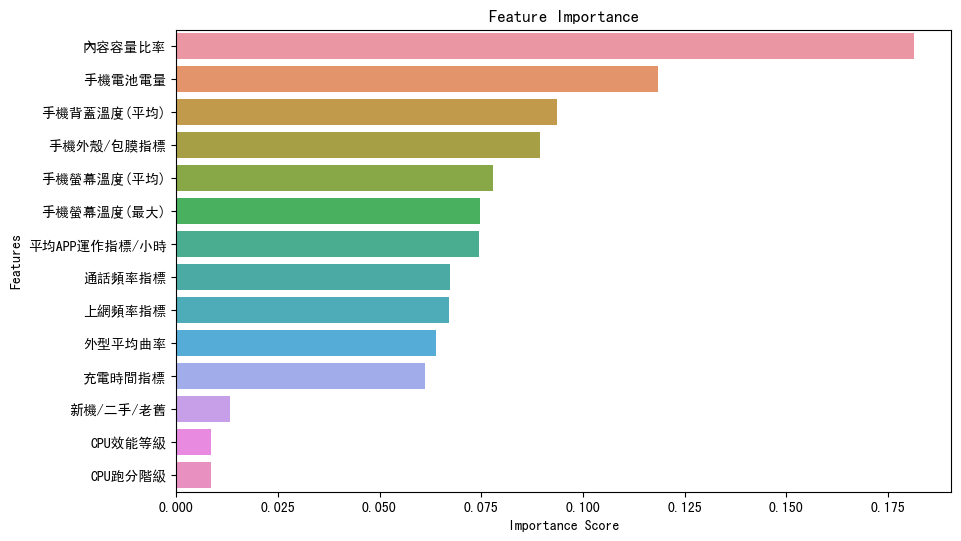

In [15]:
plt.rcParams['font.sans-serif'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False 
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [16]:
# 獲取特徵重要性
feature_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
top_features = feature_importances.nlargest(11).index.tolist()

In [17]:
# 準備基於特徵重要性的新數據集
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

In [18]:
# 標準化重要特徵
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)

In [19]:
# 重新訓練模型，使用重要特征
rf_clf.fit(X_train_top_scaled, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# 在訓練集和測試集上進行預測
y_train_pred = rf_clf.predict(X_train_top_scaled)
y_test_pred = rf_clf.predict(X_test_top_scaled)

In [21]:
# 計算準確率
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 1.0
Test Accuracy: 0.7221510883482715


In [22]:
# 分類報告
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1807
           1       1.00      1.00      1.00      1315

    accuracy                           1.00      3122
   macro avg       1.00      1.00      1.00      3122
weighted avg       1.00      1.00      1.00      3122

Test Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.84      0.77       425
           1       0.76      0.58      0.65       356

    accuracy                           0.72       781
   macro avg       0.73      0.71      0.71       781
weighted avg       0.73      0.72      0.72       781



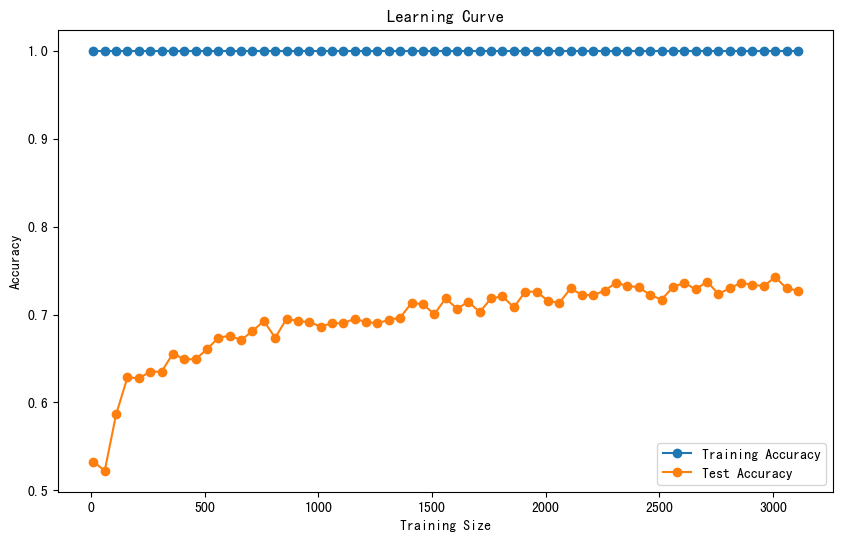

In [23]:
# 學習曲線
train_sizes = range(10, len(X_train_top_scaled), 50)
train_scores = []
test_scores = []

for size in train_sizes:
    rf_clf.fit(X_train_top_scaled[:size], y_train[:size])
    train_pred = rf_clf.predict(X_train_top_scaled[:size])
    train_scores.append(accuracy_score(y_train[:size], train_pred))
    test_pred = rf_clf.predict(X_test_top_scaled)
    test_scores.append(accuracy_score(y_test, test_pred))
    
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, 'o-', label='Training Accuracy')
plt.plot(train_sizes, test_scores, 'o-', label='Test Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()